In [3]:
import pandas as pd  # for data analysis
import numpy as np # for calculation
import matplotlib.pyplot as plt  #for plotting graph
import seaborn as sns  # for plotting graphs
from sklearn.feature_selection import SelectKBest   # for feature selection
from sklearn.feature_selection import f_classif, mutual_info_classif   # for feature selection
from sklearn.preprocessing import StandardScaler   # for feature scaling data to lower values
from sklearn.feature_extraction import DictVectorizer    # for one hot encoding
from imblearn.over_sampling import SMOTE   # for oversampling the data
from sklearn.svm import SVC  # 1st model
from sklearn.neighbors import KNeighborsClassifier   # 2nd model
from sklearn.naive_bayes import GaussianNB   # 3rd model
from sklearn.tree import DecisionTreeClassifier  # 4th model
from sklearn.ensemble import RandomForestClassifier  # 5th model
from sklearn.model_selection import train_test_split  # to split data to train and test
from sklearn.model_selection import GridSearchCV   #  one type of cross validation to find out best model and hyperparameters
from imblearn.pipeline import Pipeline   # model pipeline to prevent data leakage
from sklearn.metrics import classification_report   # to find precision, f1 score and recall
from sklearn.metrics import roc_auc_score    # AUC score
from sklearn.metrics import confusion_matrix  # to show the result in heatmap
import pickle     # to save the model
%matplotlib inline

In [4]:
df = pd.read_csv('parkinsons.data')

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
df.drop('name', axis=1, inplace=True)

#Exploratory Data Analysis and Data Preprocessing

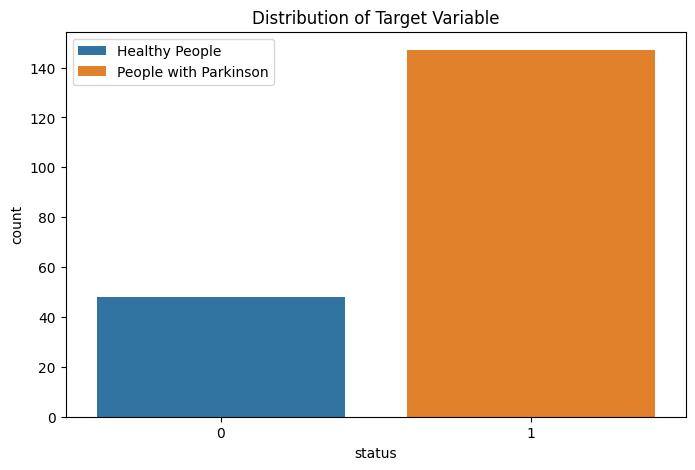

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="status", hue='status', dodge=False)
plt.title('Distribution of Target Variable')
h,l = ax.get_legend_handles_labels()
labels=["Healthy People", "People with Parkinson"]
ax.legend(h,labels, loc="upper left")
plt.show()

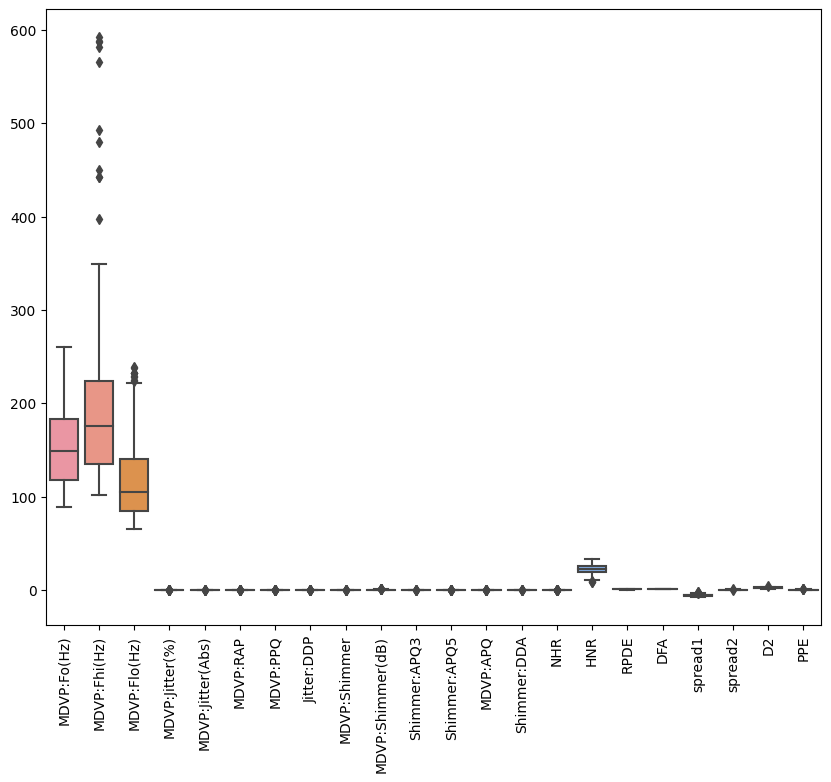

In [ ]:
plt.figure(figsize=(10, 8))
columns_to_plot = df.columns.drop('status')
ax=sns.boxplot(data=df[columns_to_plot])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(195, 23)

In [8]:
# outlier removal function
def remove_outliers_iqr(data, factor=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

In [9]:
for column in ['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']:
    df[column] = remove_outliers_iqr(df[column])

In [10]:
df.shape

(195, 23)

In [11]:
df.isnull().sum()

MDVP:Fo(Hz)          0
MDVP:Fhi(Hz)        11
MDVP:Flo(Hz)         9
MDVP:Jitter(%)       0
MDVP:Jitter(Abs)     0
MDVP:RAP             0
MDVP:PPQ             0
Jitter:DDP           0
MDVP:Shimmer         0
MDVP:Shimmer(dB)     0
Shimmer:APQ3         0
Shimmer:APQ5         0
MDVP:APQ             0
Shimmer:DDA          0
NHR                  0
HNR                  0
status               0
RPDE                 0
DFA                  0
spread1              0
spread2              0
D2                   0
PPE                  0
dtype: int64

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,184.000000,186.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,178.348571,110.774387,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,48.069220,36.249989,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.000250,83.495250,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,165.363500,101.447000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,216.430000,129.549500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,349.259000,221.156000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
#df = df[(df['MDVP:Fhi(Hz)'] <= 380)]
#df=df.dropna()

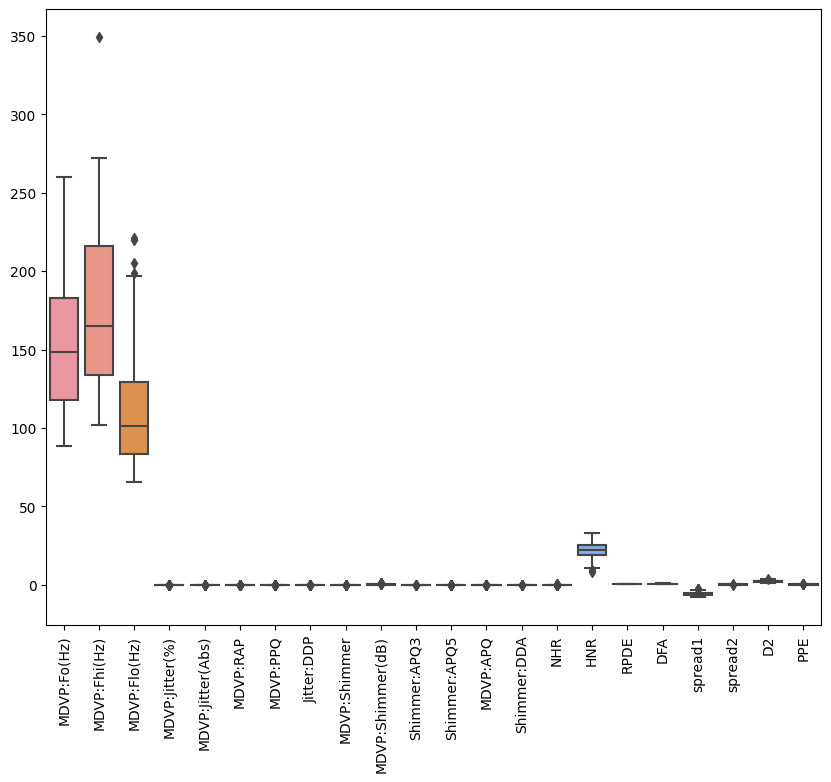

In [ ]:
plt.figure(figsize=(10, 8))
columns_to_plot = df.columns.drop('status')
ax=sns.boxplot(data=df[columns_to_plot])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

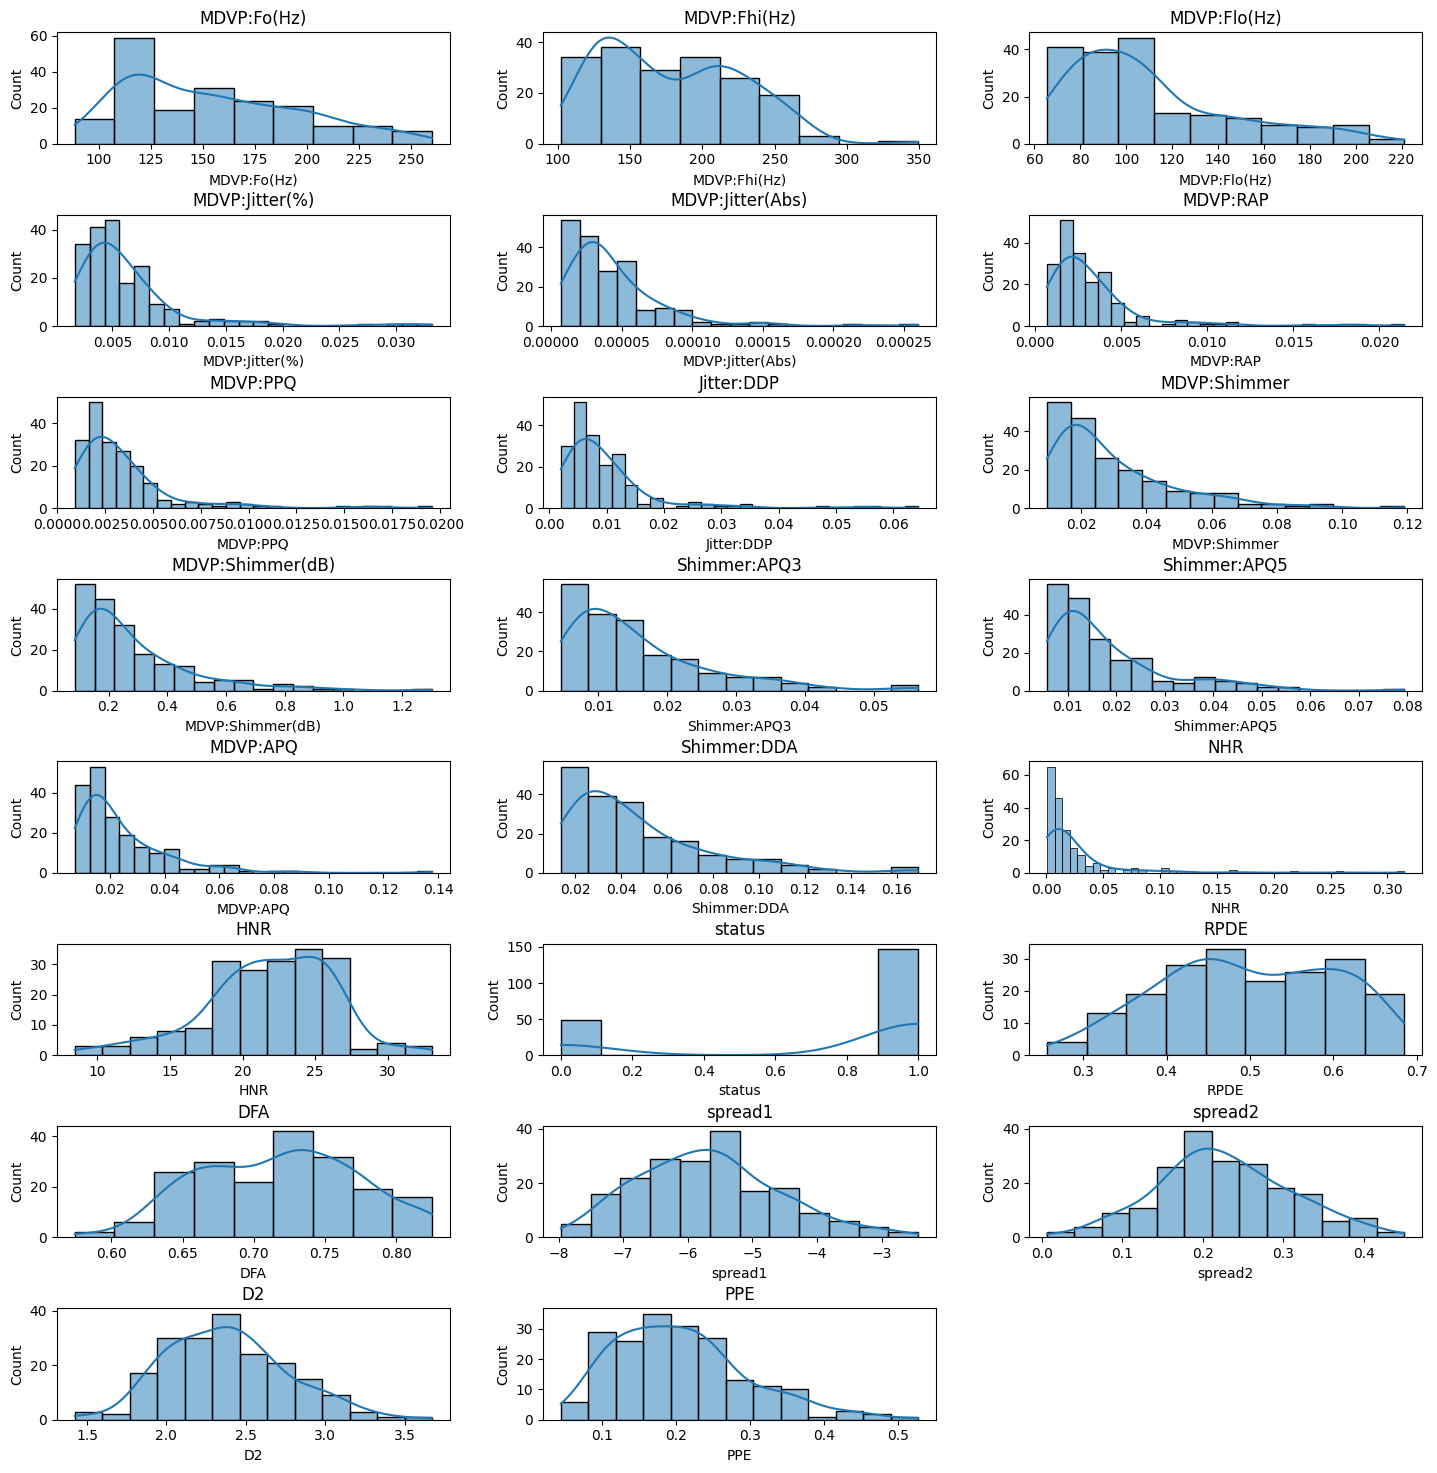

In [ ]:
# Set the number of columns per row in the plot grid
num_cols_per_row = 3

# Get the list of column names
columns = df.columns

# Calculate the number of rows needed to display all columns
num_rows = (len(columns) + num_cols_per_row - 1) // num_cols_per_row

# Create a figure and axes for the plots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 15))
fig.tight_layout(pad=3.0)

# Iterate through the columns and plot the distributions
for i, column in enumerate(columns):
    ax = axes[i // num_cols_per_row, i % num_cols_per_row]
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(column)

# Remove any empty subplots if the number of columns is not a multiple of num_cols_per_row
for i in range(len(columns), num_rows * num_cols_per_row):
    fig.delaxes(axes[i // num_cols_per_row, i % num_cols_per_row])

# Show the plots
plt.show()

In [12]:
df = df.fillna(df.median())

In [13]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

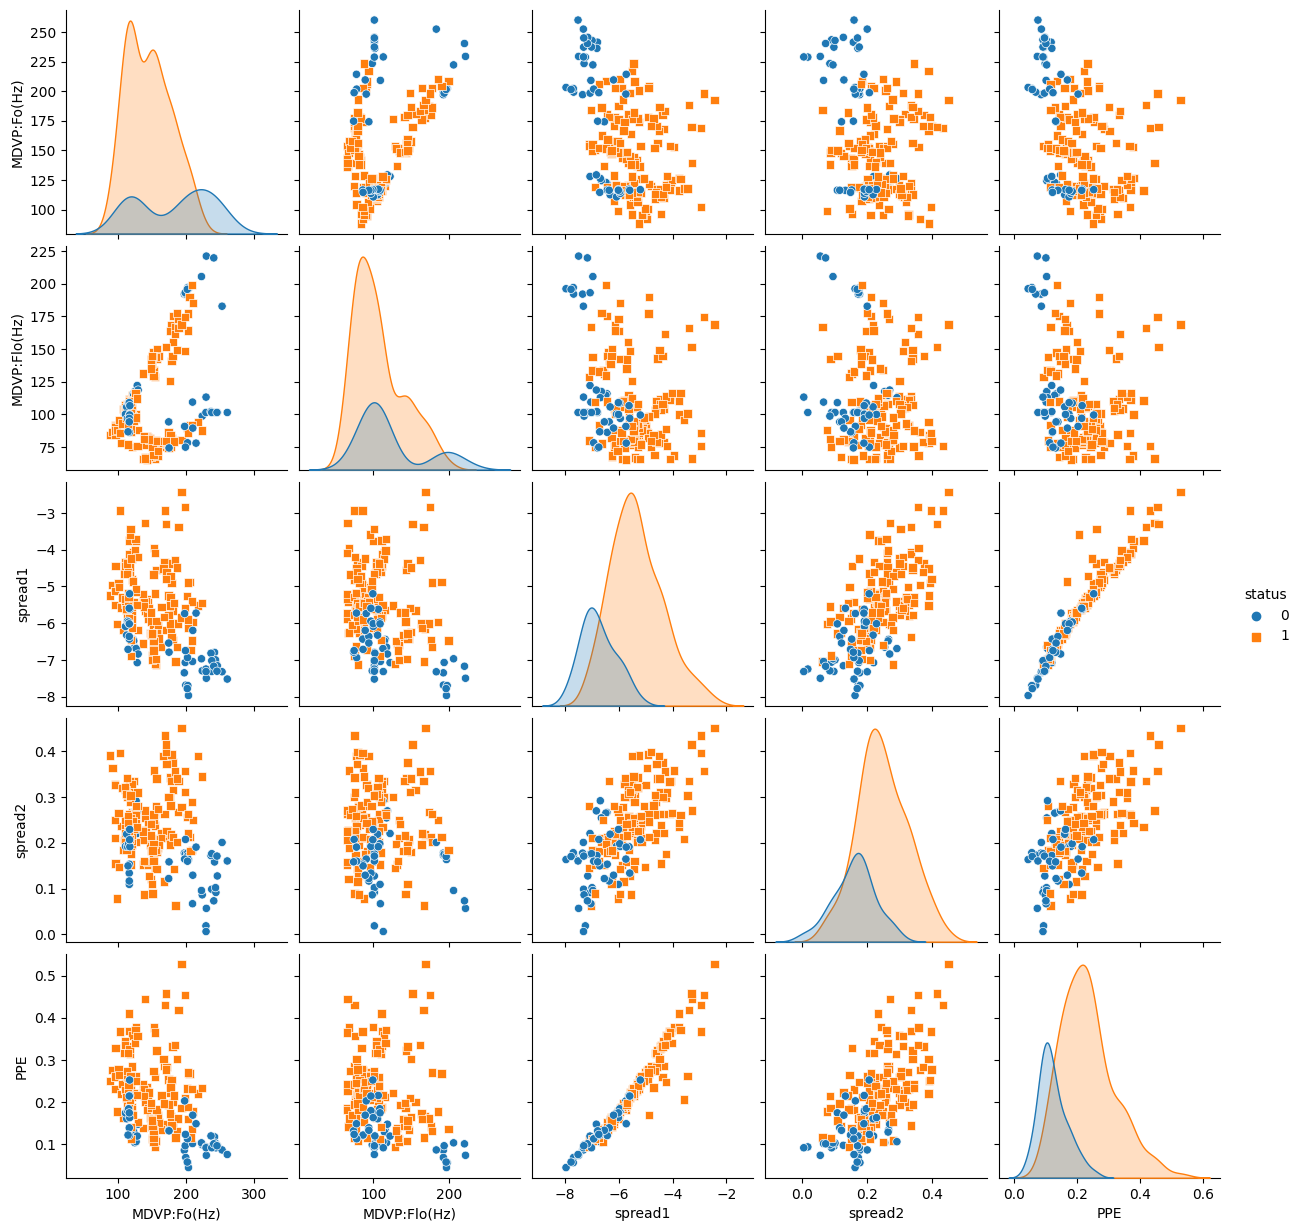

In [ ]:
columns_to_include = ['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'spread1', 'spread2', 'PPE', 'status']
sns.pairplot(df[columns_to_include], hue="status", markers=["o", "s"])
plt.show()

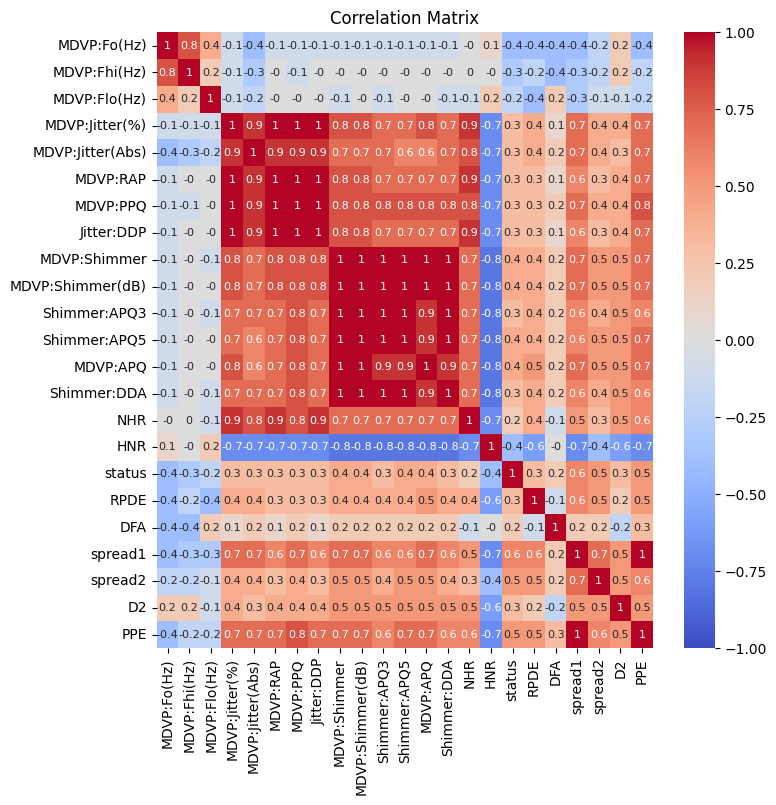

In [ ]:
plt.figure(figsize=(8, 8))
numeric_columns = df.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr().round(1), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', cbar=True, annot_kws={'size':8})
plt.title('Correlation Matrix')
plt.show()

In [14]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,201.257802,120.910542,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,169.896333,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [15]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [24]:
X = df.drop('status', axis=1)
Y = df['status']

UNIVARIATE FEATURE SELECTION

In [25]:
def featureSelect_dataframe(X, Y, criteria, k):

    reg = SelectKBest(criteria, k=k).fit(X,Y)
    X_transformed = reg.transform(X)
    selected_feature_indices = reg.get_support(indices=True)
    column_names = X.columns[selected_feature_indices].tolist()

    return print("The most important columns by feature selection method {} are: {}".format(criteria.__name__, f"{column_names}".strip('[]')))


In [26]:
feature_f = featureSelect_dataframe(X, Y, f_classif, 5)
feature_mutual = featureSelect_dataframe(X, Y, mutual_info_classif, 5)

The most important columns by feature selection method f_classif are: 'MDVP:Fo(Hz)', 'MDVP:Shimmer', 'spread1', 'spread2', 'PPE'
The most important columns by feature selection method mutual_info_classif are: 'MDVP:Fo(Hz)', 'MDVP:Jitter(Abs)', 'spread1', 'spread2', 'PPE'


# MODEL SELECTION, HYPERPARAMETERS TUNING, FEATURE SCALING & OVERSAMPLING


In [27]:
X_train_ed, X_test_ed, Y_train_ed, Y_test_ed = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=42)
X_train = X_train_ed.to_dict(orient='records')
X_test = X_test_ed.to_dict(orient='records')
Y_train = Y_train_ed.values
Y_test = Y_test_ed.values

In [28]:
X_train

[{'MDVP:Fo(Hz)': 110.739,
  'MDVP:Fhi(Hz)': 113.597,
  'MDVP:Flo(Hz)': 100.139,
  'MDVP:Jitter(%)': 0.00356,
  'MDVP:Jitter(Abs)': 3e-05,
  'MDVP:RAP': 0.0017,
  'MDVP:PPQ': 0.002,
  'Jitter:DDP': 0.0051,
  'MDVP:Shimmer': 0.01484,
  'MDVP:Shimmer(dB)': 0.133,
  'Shimmer:APQ3': 0.00754,
  'Shimmer:APQ5': 0.0095,
  'MDVP:APQ': 0.01285,
  'Shimmer:DDA': 0.02261,
  'NHR': 0.0043,
  'HNR': 26.55,
  'RPDE': 0.36909,
  'DFA': 0.776158,
  'spread1': -6.085567,
  'spread2': 0.192375,
  'D2': 1.889002,
  'PPE': 0.174152},
 {'MDVP:Fo(Hz)': 176.858,
  'MDVP:Fhi(Hz)': 205.56,
  'MDVP:Flo(Hz)': 75.344,
  'MDVP:Jitter(%)': 0.00747,
  'MDVP:Jitter(Abs)': 4e-05,
  'MDVP:RAP': 0.00418,
  'MDVP:PPQ': 0.0042,
  'Jitter:DDP': 0.01254,
  'MDVP:Shimmer': 0.04795,
  'MDVP:Shimmer(dB)': 0.435,
  'Shimmer:APQ3': 0.02679,
  'Shimmer:APQ5': 0.03022,
  'MDVP:APQ': 0.0351,
  'Shimmer:DDA': 0.08037,
  'NHR': 0.0547,
  'HNR': 13.893,
  'RPDE': 0.556494,
  'DFA': 0.729586,
  'spread1': -5.288912,
  'spread2': 0.34307

In [29]:
Y_train

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1])

param_grid = [
    {
        'classifier': [SVC()],  # SVM model
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'poly','rbf','sigmoid']
    },
    {
        'classifier': [KNeighborsClassifier()],  # kNN model
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    }
]

In [30]:
pipeline = Pipeline([
    ('dv', DictVectorizer(sparse=False)),     # for one hot encoding
    ('scaler', StandardScaler()),   # to scale the data
    #('smote', SMOTE()),   # to oversample the minority data
    ('classifier', 'passthrough')  # Placeholder for the model
])

In [31]:
param_grid = [
    {
        'classifier': [SVC()],  # SVM model
        'classifier__C': [0.1, 1, 3, 5, 10],
        'classifier__kernel': ['linear', 'poly','rbf','sigmoid']
    },
    {
        'classifier': [KNeighborsClassifier()],  # kNN model
        'classifier__n_neighbors': [1, 3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    {
        'classifier': [GaussianNB()],  # Gaussian Naive Bayes model
    },
    {
        'classifier': [DecisionTreeClassifier()],  # Decision Tree model
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__max_depth': [3, 6, 9],
        'classifier__max_leaf_nodes': [3, 6, 9],
    },
    {
        'classifier': [RandomForestClassifier()],  # Random Forest model
        'classifier__n_estimators': [25, 50, 100, 150],
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__max_depth': [3, 6, 9],
        'classifier__max_leaf_nodes': [3, 6, 9],
    }
]

In [32]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('dv', DictVectorizer(sparse=False)),
                                       ('scaler', StandardScaler()),
                                       ('classifier', 'passthrough')]),
             param_grid=[{'classifier': [SVC(C=10, kernel='poly')],
                          'classifier__C': [0.1, 1, 3, 5, 10],
                          'classifier__kernel': ['linear', 'poly', 'rbf',
                                                 'sigmoid']},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [1, 3, 5,...
                         {'classifier': [DecisionTreeClassifier()],
                          'classifier__max_depth': [3, 6, 9],
                          'classifier__max_features': ['sqrt', 'log2', None],
                          'classifier__max_leaf_nodes': [3, 6, 9]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [3, 6, 9],
                          'classifier__max_features': ['sqrt', 'log2', None],
                          'classifier__max_leaf_nodes': [3, 6, 9],
                          'classifier__n_estimators': [25, 50, 100, 150]}],
             scoring='roc_auc')

In [33]:
print('Best Model:', grid_search.best_estimator_)
print('highest score',  grid_search.best_score_)
print('Best Hyperparameters:', grid_search.best_params_)

Best Model: Pipeline(steps=[('dv', DictVectorizer(sparse=False)),
                ('scaler', StandardScaler()),
                ('classifier', SVC(C=10, kernel='poly'))])
highest score 0.9514468864468866
Best Hyperparameters: {'classifier': SVC(C=10, kernel='poly'), 'classifier__C': 10, 'classifier__kernel': 'poly'}


In [34]:
result_df = pd.DataFrame(grid_search.cv_results_)

In [35]:
pd.options.display.max_colwidth = 200
pd.set_option('display.max_rows', None)
columns = ['params','mean_test_score','rank_test_score']  # to display the result of GridSearchCV: all the model corresponding it hyperparameters, test score and its ranking
result_df[columns]

,params,mean_test_score,rank_test_score
0,"{'classifier': SVC(C=10, kernel='poly'), 'classifier__C': 0.1, 'classifier__kernel': 'linear'}",0.883059,128
1,"{'classifier': SVC(C=10, kernel='poly'), 'classifier__C': 0.1, 'classifier__kernel': 'poly'}",0.882619,132
2,"{'classifier': SVC(C=10, kernel='poly'), 'classifier__C': 0.1, 'classifier__kernel': 'rbf'}",0.876941,134
3,"{'classifier': SVC(C=10, kernel='poly'), 'classifier__C': 0.1, 'classifier__kernel': 'sigmoid'}",0.868352,136
4,"{'classifier': SVC(C=10, kernel='poly'), 'classifier__C': 1, 'classifier__kernel': 'linear'}",0.890238,114
5,"{'classifier': SVC(C=10, kernel='poly'), 'classifier__C': 1, 'classifier__kernel': 'poly'}",0.907106,81
6,"{'classifier': SVC(C=10, kernel='poly'), 'classifier__C': 1, 'classifier__kernel': 'rbf'}",0.883535,126
7,"{'classifier': SVC(C=10, kernel='poly'), 'classifier__C': 1, 'classifier__kernel': 'sigmoid'}",0.882802,129
8,"{'classifier': SVC(C=10, kernel='poly'), 'classifier__C': 3, 'classifier__kernel': 'linear'}",0.885586,121
9,"{'classifier': SVC(C=10, kernel='poly'), 'classifier__C': 3, 'classifier__kernel': 'poly'}",0.932198,19


In [36]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [37]:
pred_train = best_model.predict(X_train)

In [38]:
auc_train = roc_auc_score(Y_train,pred_train)

In [39]:
auc_train

0.916815343443354

In [ ]:
pred_test = best_model.predict(X_test)

In [ ]:
prediction_df = pd.DataFrame({"Actual":Y_test,"Prediction":pred_test})

In [ ]:
prediction_df.head()

,Actual,Prediction
0,0,1
1,1,1
2,1,1
3,1,1
4,0,0


In [ ]:
auc_score = roc_auc_score(Y_test,pred_test)

In [ ]:
auc_score

0.8655172413793103

In [ ]:
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.95      0.99      0.97       118

    accuracy                           0.96       156
   macro avg       0.96      0.92      0.94       156
weighted avg       0.96      0.96      0.95       156



In [ ]:
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



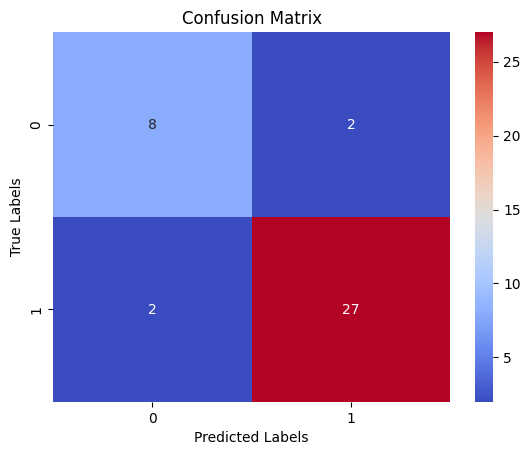

In [ ]:
cm = confusion_matrix(Y_test, pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

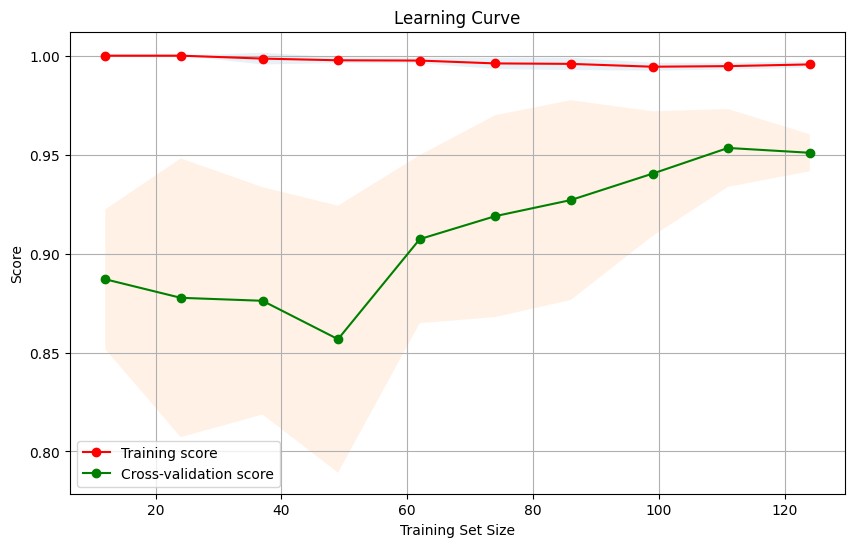

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, Y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='roc_auc')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

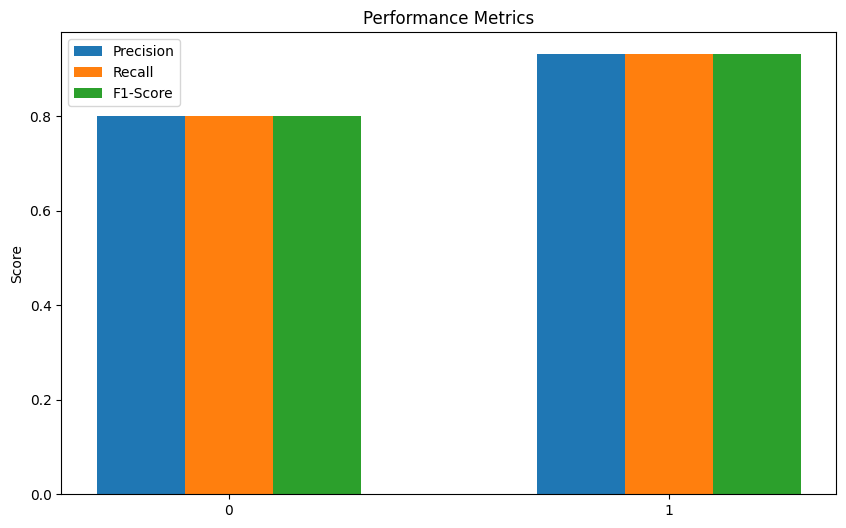

In [ ]:
report= classification_report(Y_test,pred_test, output_dict=True)
class_names = list(report.keys())[:-3]
precision = []
recall = []
f1_score = []
for class_name in class_names:
    precision.append(report[class_name]['precision'])
    recall.append(report[class_name]['recall'])
    f1_score.append(report[class_name]['f1-score'])

# Plotting the performance metrics
x = np.arange(len(class_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title('Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

plt.show()

In [ ]:
output_file = 'model.bin'

with open(output_file, 'wb') as f_out:
    pickle.dump(best_model, f_out)

print(f'The model is saved to {output_file}')

The model is saved to model.bin


# Testing

In [ ]:
customer = X_test[4]

In [ ]:
customer

{'MDVP:Fo(Hz)': 222.236,
 'MDVP:Fhi(Hz)': 231.345,
 'MDVP:Flo(Hz)': 205.495,
 'MDVP:Jitter(%)': 0.00266,
 'MDVP:Jitter(Abs)': 1e-05,
 'MDVP:RAP': 0.00152,
 'MDVP:PPQ': 0.00144,
 'Jitter:DDP': 0.00457,
 'MDVP:Shimmer': 0.01643,
 'MDVP:Shimmer(dB)': 0.145,
 'Shimmer:APQ3': 0.00867,
 'Shimmer:APQ5': 0.01108,
 'MDVP:APQ': 0.012,
 'Shimmer:DDA': 0.02602,
 'NHR': 0.0034,
 'HNR': 25.856,
 'RPDE': 0.364867,
 'DFA': 0.694399,
 'spread1': -6.966321,
 'spread2': 0.095882,
 'D2': 2.278687,
 'PPE': 0.103224}

In [ ]:
test = best_model.predict([customer])[0]

In [ ]:
test

0

In [ ]:
Y_test[4]

0

In [ ]:
def disease(x):
  if (x == 0):
     return 'The person does not have parkinson disease'
  else:
     return 'The person has parkinson disease'

In [ ]:
disease(test)

'The person does not have parkinson disease'

In [ ]:
myDict = {
    "P1": disease(test)
}

In [ ]:
myDict

{'P1': 'The person does not have parkinson disease'}

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'